## Demo

In [2]:
import numpy as np

import dataloader
import util
import model

#to retrain or not to retrain
#load = False
load = True

#load data
dataset = dataloader.DataLoader(simulator=np.load('G.npy'), verbose=True)
x_train, x_test, y_train, y_test, y_reg_train, y_reg_test = dataset.load_data()

#for dobs, assume the label and reference model are known
ref = 11
d_obs = y_reg_test[ref:ref+1]
d_obs_label = y_test[ref:ref+1] 
m_ref = x_test[ref:ref+1]

class_names = ['Zero', 'One', 'Two', 'Three', 'Four', 'Five', 'Six', 'Seven', 'Eight', 'Nine']

'''
#visualize first 9 samples of input images/data based on class labels, within the training dataset
unique_labels, label_counts = np.unique(y_train, return_counts=True)
for label in unique_labels:
    x_train_perlabel = x_train[np.squeeze(y_train) == label]
    fig = util.plot_tile(x_train_perlabel[0:9, :, :])

fig = util.plot_signals(y_reg_train, y_train)
fig.savefig('readme/signals.png')
'''

Loaded training data x (60000, 28, 28, 1) and y (60000, 128) and y_labels (60000,)
Loaded testing data x (10000, 28, 28, 1) and y (10000, 128) and y_labels (10000,)


"\n#visualize first 9 samples of input images/data based on class labels, within the training dataset\nunique_labels, label_counts = np.unique(y_train, return_counts=True)\nfor label in unique_labels:\n    x_train_perlabel = x_train[np.squeeze(y_train) == label]\n    fig = util.plot_tile(x_train_perlabel[0:9, :, :])\n\nfig = util.plot_signals(y_reg_train, y_train)\nfig.savefig('readme/signals.png')\n"

## Step 1: Scenario selection 

Forward simulations ran : 6000 out of 60000 models.
Trained model loaded
Confusion matrix, without normalization
Validation accuracy: 0.969


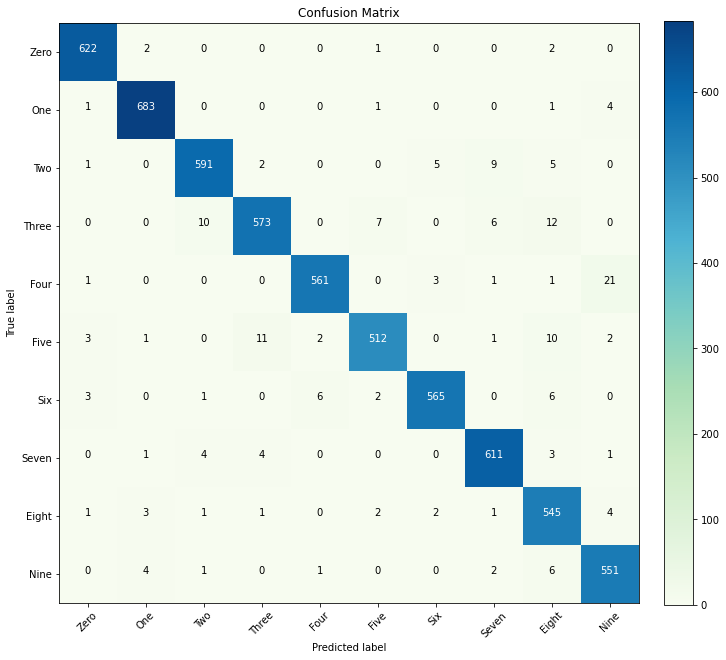

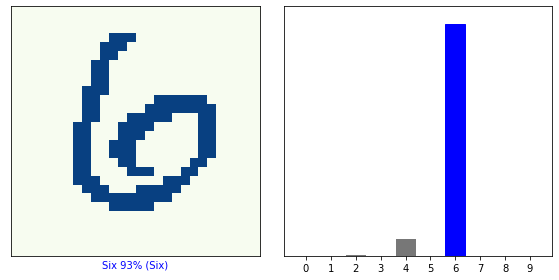

In [3]:
GSI = model.GSI(x_train, y_train, sample_ratio=0.1, simulator=dataset.simulator, class_names=class_names)
GSI.train_classifier(epoch=100, load=load)
GSI.inspect_classifier()

#assume that d_obs_label and m_ref are known 
GSI.get_proportion(d_obs, d_obs_label, m_ref)

## Step 2: Inversion 